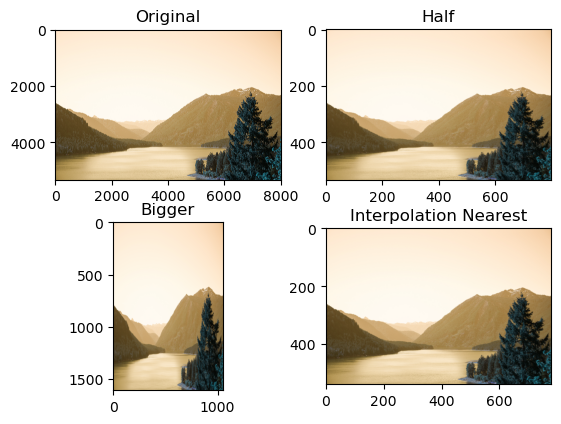

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Naumaan\Downloads\img_43.jpg", 1)#GIve the path of the image here

half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (780, 540),
interpolation = cv2.INTER_LINEAR)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])

plt.show()


In [13]:
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2

def show_images(images):
        for i, img in enumerate(images):
                cv2.imshow("image_" + str(i), img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

img_path = r"C:\Users\Naumaan\OneDrive\Desktop\WhatsApp Image 2023-04-23 at 13.48.29.jpg"#GIve the path of the image here

image = cv2.imread(img_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)

edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)


cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

(cnts, _) = contours.sort_contours(cnts)

cnts = [x for x in cnts if cv2.contourArea(x) > 100]

ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box
dist_in_pixel = euclidean(tl, tr)
dist_in_cm = 2
pixel_per_cm = dist_in_pixel/dist_in_cm


for cnt in cnts:
        box = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(box)
        box = np.array(box, dtype="int")
        box = perspective.order_points(box)
        (tl, tr, br, bl) = box
        cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
        mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
        mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
        wid = euclidean(tl, tr)/pixel_per_cm
        ht = euclidean(tr, br)/pixel_per_cm
        cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
        cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

show_images([image])